In [1]:
import pandas as pd 

from IPython.display import display

import plotly.express as px

import matplotlib.pyplot as plt

import numpy as np

import seaborn as sns

from scipy import stats as st

from sklearn.model_selection import train_test_split 

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression 

from sklearn.metrics import accuracy_score

# Рекомендация тарифов

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span><ul class="toc-item"><li><span><a href="#Описание-тарифов" data-toc-modified-id="Описание-тарифов-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание тарифов</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Описание данных</a></span></li></ul></li><li><span><a href="#Осмотр-данных" data-toc-modified-id="Осмотр-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Осмотр данных</a></span></li><li><span><a href="#Разбиение-данных-на-выборки" data-toc-modified-id="Разбиение-данных-на-выборки-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Разбиение данных на выборки</a></span></li><li><span><a href="#Построение-простой-модели-для-задания-&quot;базовой&quot;-точки-отсчета" data-toc-modified-id="Построение-простой-модели-для-задания-&quot;базовой&quot;-точки-отсчета-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Построение простой модели для задания "базовой" точки отсчета</a></span></li><li><span><a href="#Исследование-моделей" data-toc-modified-id="Исследование-моделей-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Исследование моделей</a></span><ul class="toc-item"><li><span><a href="#Решающее-дерево-(decision-tree)" data-toc-modified-id="Решающее-дерево-(decision-tree)-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Решающее дерево (decision tree)</a></span></li><li><span><a href="#Случайный-лес-(random-forest)" data-toc-modified-id="Случайный-лес-(random-forest)-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Случайный лес (random forest)</a></span></li><li><span><a href="#Логистическая-регрессия-(Logistic-Regression)" data-toc-modified-id="Логистическая-регрессия-(Logistic-Regression)-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Логистическая регрессия (Logistic Regression)</a></span></li></ul></li><li><span><a href="#Проверка-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-модели-на-тестовой-выборке-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Проверка модели на тестовой выборке</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span><strong>Вывод</strong></a></span></li></ul></div>

## Описание проекта

В нашем распоряжении данные о поведении клиентов, которые уже перешли на тарифы **"Смарт"** и **"Ультра"** (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных пропустим — мы её уже сделали.

Наша задача построить модель с максимально большим значением *accuracy*. Нужно довести долю правильных ответов по крайней мере до 0.75.

### Описание тарифов

||**Тариф «Смарт»**|**Тариф «Ультра»**|
|:---|:---|:---|
|Ежемесячная плата:|550 рублей|1950 рублей|
|Включено|500 минут разговора, 50 сообщений и 15 Гб интернет-трафика|3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика|
|***Стоимость услуг сверх тарифного пакета:***||
|минута разговора:|3 рубля|1 рубль|
|сообщение:|3 рубля|1 рубль|
|1 Гб интернет-трафика:|200 рублей|150 рублей|

*«Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.*

### Описание данных

- `сalls` — количество звонков
- `minutes` — суммарная длительность звонков в минутах
- `messages` — количество sms-сообщений
- `mb_used` — израсходованный интернет-трафик в Мб
- `is_ultra` — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0)

## Осмотр данных

Откроем файл и посмотрим, что в нем есть. 

In [2]:
df_users_behavior = pd.read_csv('users_behavior.csv')
df_users_behavior.head(10)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


In [3]:
print(df_users_behavior.info())
print(df_users_behavior.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB
None
0


Отлично, в нашем наборе данных нет грубых повторов и пропусков. Посмотрим на данные в виде графиков.

In [4]:
def histogram_boxplot(data,
                      xlabel=None,
                      title=None,
                      font_scale=1,
                      figsize=(16, 8),
                      bins=None):
    """ Диграмма размаха и гистограмма будут отрисованны вместе на одном кадре. 
    На графиках будут также нарисованны линия среднего и медианы.
    data: 1-d data array
    xlabel: xlabel 
    title: title
    font_scale: the scale of the font (default 1)
    figsize: size of fig (default (16, 8))
    bins: number of bins (default None / auto)
    """
    
    sns.set(font_scale=font_scale)
    
    f2, (ax_box2, ax_hist2) = plt.subplots(
        2,
        sharex=True,
        gridspec_kw={"height_ratios": (.15, .85)},
        figsize=figsize
    )
    sns.boxplot(x=data, ax=ax_box2)
    
    if bins:
        sns.histplot(x=data, ax=ax_hist2, bins=bins, kde=True)
    else:
        sns.histplot(data, ax=ax_hist2, kde=True)

    plt.axvline(x=data.mean(), linewidth=2, color='r', label="mean", alpha=0.8)
    plt.axvline(x=data.median(),
                linewidth=2,
                color='y',
                label="median",
                alpha=0.8)
    ax_hist2.legend()

    if xlabel:
        ax_hist2.set(xlabel=xlabel)
    if title:
        ax_box2.set(title=title)
    plt.show()    

In [5]:
def info_column(column_name, data, bins=None):
    
    '''Функция смотри тип данных в столбце:
    - если тип object, то смотрит уникальные значения
    - в противном случае оценивается распределение'''
    
    if column_name.dtype == 'object':
        
        print(column_name.name)
        print(column_name.unique())
        print()
        print(column_name.describe())
        print()
        
    else:
        bins=bins
        print(column_name.name)
        print(column_name.describe())
        histogram_boxplot(column_name, xlabel=column_name.name, title = 'Распределение '+ column_name.name)        

calls
count    3214.000000
mean       63.038892
std        33.236368
min         0.000000
25%        40.000000
50%        62.000000
75%        82.000000
max       244.000000
Name: calls, dtype: float64


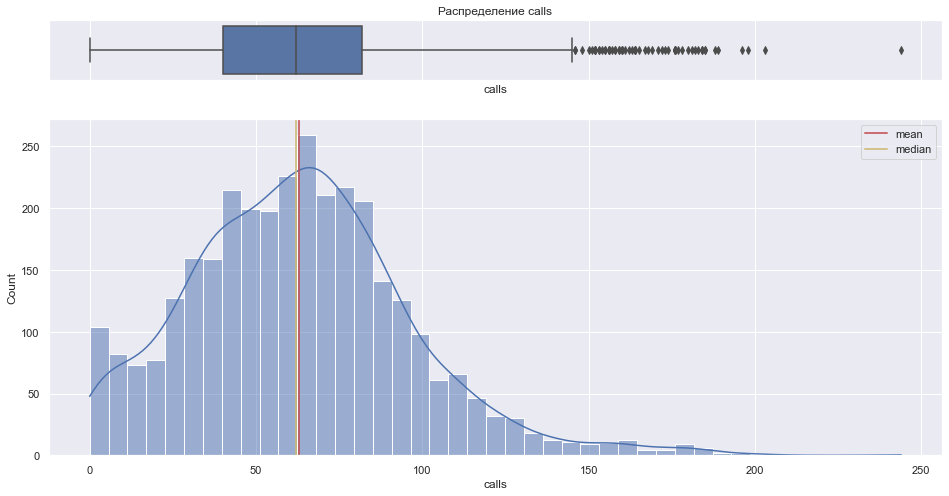

minutes
count    3214.000000
mean      438.208787
std       234.569872
min         0.000000
25%       274.575000
50%       430.600000
75%       571.927500
max      1632.060000
Name: minutes, dtype: float64


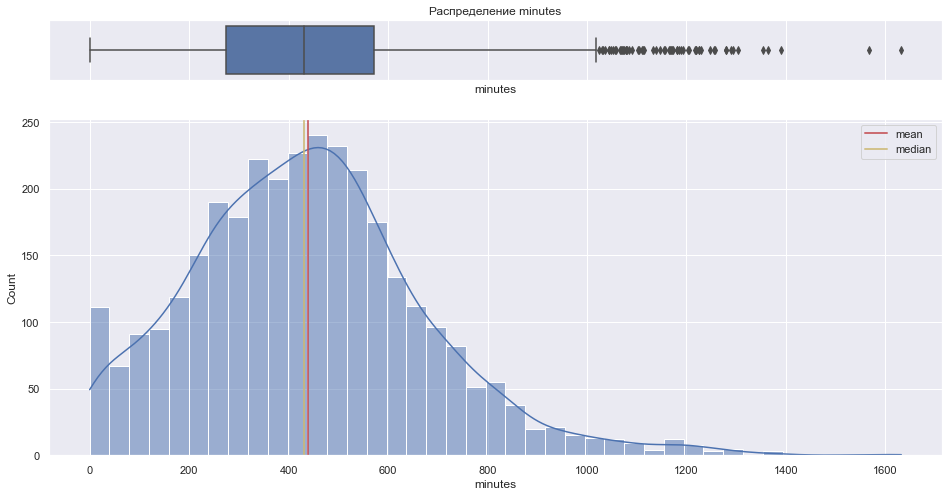

messages
count    3214.000000
mean       38.281269
std        36.148326
min         0.000000
25%         9.000000
50%        30.000000
75%        57.000000
max       224.000000
Name: messages, dtype: float64


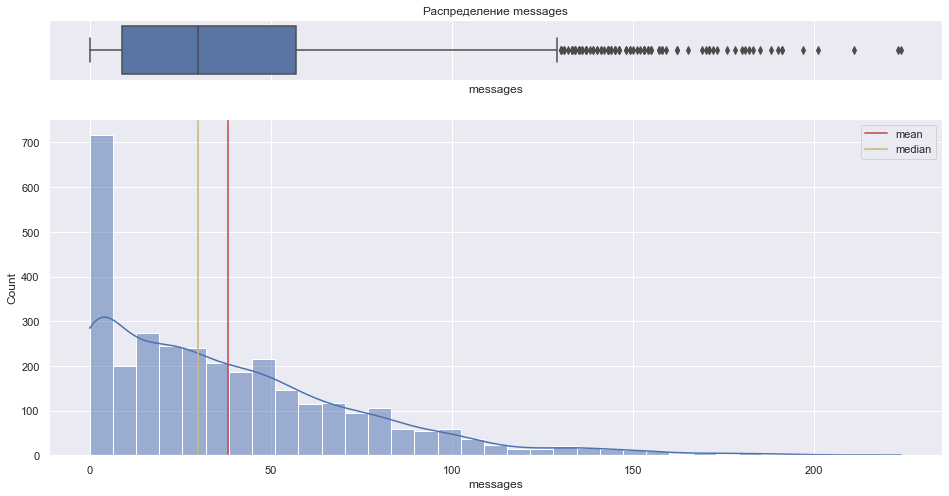

mb_used
count     3214.000000
mean     17207.673836
std       7570.968246
min          0.000000
25%      12491.902500
50%      16943.235000
75%      21424.700000
max      49745.730000
Name: mb_used, dtype: float64


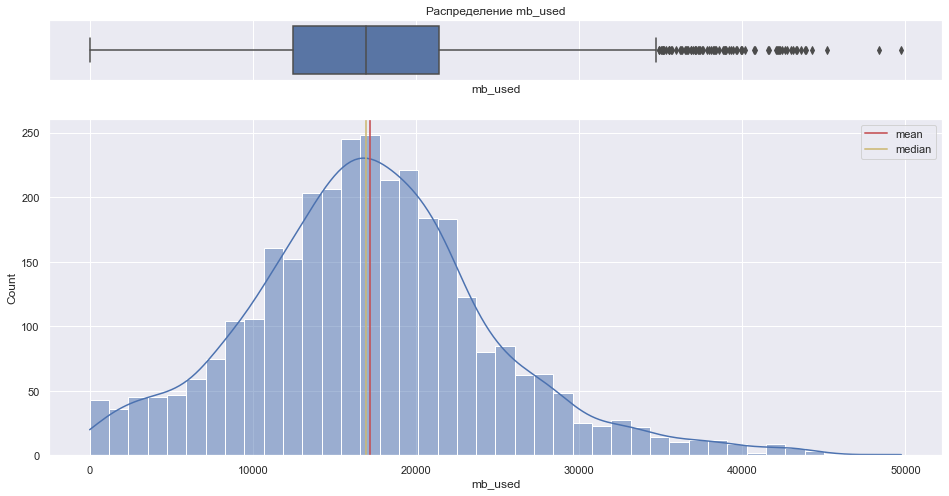

is_ultra
count    3214.000000
mean        0.306472
std         0.461100
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: is_ultra, dtype: float64


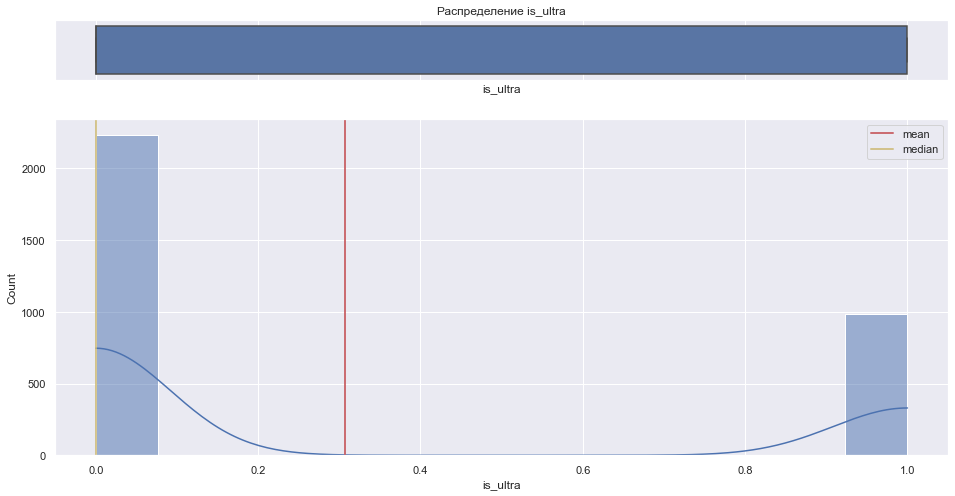

In [6]:
for column in df_users_behavior.columns:
    info_column(df_users_behavior[column], df_users_behavior)

В данном нам нам наборе данных нет грубых повторов и пропусков - данные были предобработаны ранее. Из графиков видно, что распределения количества и продолжительности звонков, а так же количества использованного трафика имеют форму схожую с формой нормального распределения. У количества СМС есть большой пик на нуле, оно и понятно - не так много людей пользуются СМСками в век цифровых мессенджеров.

## Разбиение данных на выборки

Разобьем наш набор данных на три выборки: обучающую, валидационную и тестовую. Делить будем в соотношении 60/20/20.

In [7]:
df_train, df_valid = train_test_split(df_users_behavior, test_size=0.2, random_state=12345)

In [8]:
df_train, df_test = train_test_split(df_train, test_size=0.25, random_state=12345)

In [9]:
df_train1, df_valid1 = train_test_split(df_users_behavior, test_size=0.2, random_state=12345)

In [10]:
df_train1, df_test1 = train_test_split(df_train, test_size=0.25, random_state=12345)

In [11]:
print('Размер первоначального набора данных:', df_users_behavior.shape[0])
print('Размер обучающей выборки: {:.2%}'.format(df_train.shape[0]/df_users_behavior.shape[0]))
print('Размер валидационной выборки: {:.2%}'.format(df_valid.shape[0]/df_users_behavior.shape[0]))
print('Размер тестовой выборки: {:.2%}'.format(df_test.shape[0]/df_users_behavior.shape[0]))

Размер первоначального набора данных: 3214
Размер обучающей выборки: 59.99%
Размер валидационной выборки: 20.01%
Размер тестовой выборки: 20.01%


Перед нами стоит задача бинарной классификации. Для ее решения мы будем использовать методы обучения с учителем. Для этого нам необходимо выделить из нашего набора данных признаки `features` - в нашем наборе данных это все столбцы кроме `is_ultra`, который в свою очередь будет целевым признаком `target`. 

In [12]:
features_train = df_train.drop('is_ultra', axis=1)
target_train = df_train['is_ultra']

In [13]:
features_valid = df_valid.drop('is_ultra', axis=1)
target_valid = df_valid['is_ultra']

In [14]:
features_test = df_test.drop('is_ultra', axis=1)
target_test = df_test['is_ultra']

## Построение простой модели для задания "базовой" точки отсчета

Построим простой классификатор, который не предполагает вовлечение машинного обучения, а только используют простые правила для определения результата. Для этого мы будем использовать `DummyClassifier` из библиотеки `sklearn`. Данный классификатор позволяет использовать несколько стратегий для получения предсказания:
1. `most_frequent` - все предсказания будут заполнены значением наиболее часто встречающемся в обучающем наборе данных. Нам известно, что конкретно в нашем случае это будет 0.
2. `comstant` - все значения будут заполнены некой константой. Выберем для этого единицу, так как нули проверит предыдущая стратегия.
3. `stratified` - эта стратегия генерирует прогнозы, учитывая распределение классов обучающих данных. Она отличается от `most_frequent` стратегии, поскольку вместо этого связывает вероятность того, что каждая точка данных является наиболее частой меткой класса. 
4. `uniform` - эта стратегия генерирует предсказания случайным образом и стремится к нормальному распределению данных.

In [15]:
from sklearn.dummy import DummyClassifier

In [16]:
strategies = ['most_frequent', 'stratified', 'uniform', 'constant'] 

test_results = [] 
for strategy in strategies: 
    if strategy =='constant': 
        dclf = DummyClassifier(strategy = strategy, random_state = 0, constant = 1) 
    else: 
        dclf = DummyClassifier(strategy = strategy, random_state = 0) 
    dclf.fit(features_train, target_train) 
    result = dclf.score(features_test, target_test) 
    test_results.append(result)

In [17]:
print(test_results)

[0.6889580093312597, 0.5909797822706065, 0.48833592534992226, 0.3110419906687403]


In [18]:
print(test_results[0]+test_results[3])

1.0


C:\Users\kvasilkov\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0.5, 'Test Score'), Text(0.5, 0, 'Strategy')]

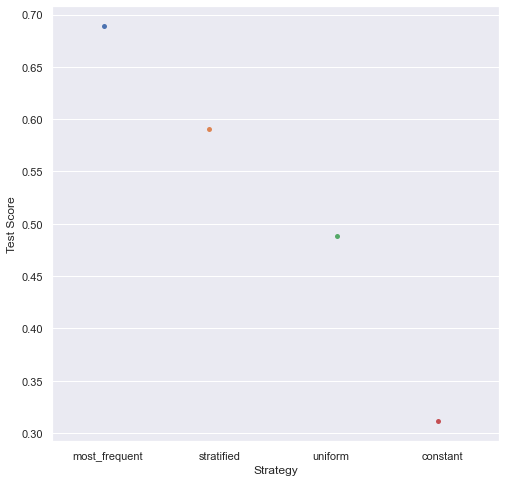

In [19]:
fig = plt.subplots(figsize=(8, 8))
fig = sns.stripplot(strategies, test_results)
fig.set(xlabel ='Strategy', ylabel ='Test Score') 

Итак, из полученных данных мы видим:
1. Стратегии `most_frequent` и `constant` дали диаметрально противоположные результаты, а сумма их результатов дает единицу, что вполне логично для бинарного рампределения, где мы специально выбрали константой более редкое значение.
2. Даже лучшая из 'тупых' стратегий, имеет сильно хуже предсказательную способность, чем нужная нам по условиям задания.

## Исследование моделей

Теперь, когда мы разделили данные, можно приступать к обучению моделей. 

### Решающее дерево (decision tree)

Первой посмотрим на самую простую модель - **Решающее дерево**. Для максимально высокого качества нашей модели попробуем в цикле перебрать несколько вариантов глубины дерева. Для оценки зависимости качества предсказания от глубины дерева запишем все результаты в отдельную переменную и потом построим график.

In [20]:
best_dt_model = None
best_dt_result = 0
best_dt_depth = 0

dt_predictions_results = []

for depth in range(2, 35):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth) 
    model.fit(features_train, target_train) 
    predictions = model.predict(features_valid)
    result = accuracy_score(target_valid, predictions)
    dt_predictions_results.append(result)
    if result > best_dt_result:
        best_dt_model = model
        best_dt_result = result
        best_dt_depth = depth
        
        
print(f'Accuracy лучшей модели: {best_dt_result}, глубина {best_dt_depth}')

dt_predictions_results = pd.Series(dt_predictions_results)

Accuracy лучшей модели: 0.7884914463452566, глубина 5


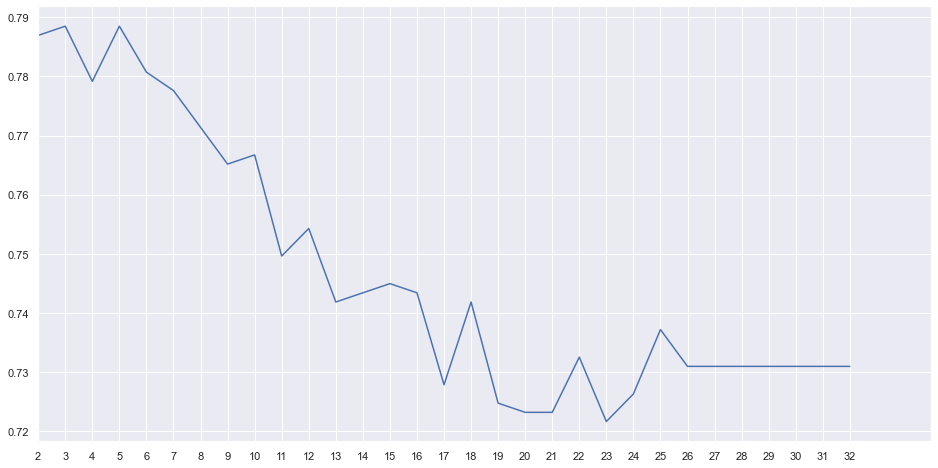

In [21]:
dt_predictions_results.plot(xticks=dt_predictions_results.index, xlim=(2,35), figsize=(16,8), grid=True)

**Вывод:**

На графике видно, что увеличение глубины дерева дает ограниченное улучшение предсказательной силы нашей модели. Наилучший результат мы получили на глубине 5. После глубины 7 результат значительно падает, а после 26 не меняется совсем.

### Случайный лес (random forest)

Следующей будем использовать модель **Случайный лес**. Для улучшения качества этой модели мы можем перебирать два парамметра: количество деревьев и их глубина.

In [22]:
best_rf_depth = 0
best_rf_model = None
best_rf_result = 0
best_rf_est = 0
random_state = 12345

for est in range(2, 15):
    for depth in range(2, 35):
        model = RandomForestClassifier(random_state=random_state, max_depth=depth, n_estimators=est)
        model.fit(features_train, target_train)
        predictions = model.predict(features_valid)
        result = model.score(features_valid, target_valid)
        if result > best_rf_result:
            best_rf_depth = depth
            best_rf_model = model
            best_rf_result = result
            best_rf_est = est
            
            
print(f'Accuracy лучшей модели: {best_rf_result}, глубина {best_rf_depth}, количество деревьев: {best_rf_est}')

Accuracy лучшей модели: 0.80248833592535, глубина 7, количество деревьев: 3


**Вывод**

Случайный лес показывает немного более хороший результат, чем одинокое дерево. А наилучшая комбинация это 3 дерева с глубиной 7.

### Логистическая регрессия (Logistic Regression)

Осталось проверить какой результат нам покажет модель **Логистической регрессии**. Это самая простая модель наименее склонная к переобучению.

In [23]:
model_lr = LogisticRegression(random_state=12345, solver='newton-cg') 

model_lr.fit(features_train, target_train) 

result_lr = model_lr.score(features_valid, target_valid) 

print("Accuracy модели логистической регрессии на тренировочной выборке:", model_lr.score(features_train, target_train))
print("Accuracy модели логистической регрессии на валидационной выборке:", result_lr)

Accuracy модели логистической регрессии на тренировочной выборке: 0.7510373443983402
Accuracy модели логистической регрессии на валидационной выборке: 0.7589424572317263


## Проверка модели на тестовой выборке

Итак у нас получилось три модели. Проверим как они покажут себя на тестовой выборке. Соберем их в словарь и напишем функцию, которая их прогонит и покажет нам результаты. Просто точность предсказаний на тестовой выборке не столь репрезентативна, поэтому соберем точности для всех трех выборок в единую таблицу, чтобы было удобно сравнивать.

In [24]:
models_dict = {
    'Дерево решений' : best_dt_model,
    'Случайный лес' : best_rf_model,
    'Логистическая регрессия' : model_lr
}

In [25]:
features = [features_train, features_valid, features_test]
target = [target_train, target_valid, target_test]

In [26]:
models_names = {
    'Дерево решений':[],
    'Случайный лес':[],
    'Логистическая регрессия':[]
}

In [27]:
def model_testing(models_dict, features, target, models_names):
    for k, v in models_dict.items():
        for i in range(len(features)):
            result = v.score(features[i], target[i])
            models_names[k].append(result)
    return models_names

In [28]:
models_names = model_testing(models_dict, features, target, models_names)

In [29]:
results_table = pd.DataFrame(data=models_names, index=['тренировочная', 'валидационная', 'тестовая'])
display(results_table)

,Дерево решений,Случайный лес,Логистическая регрессия
тренировочная,0.827282,0.850622,0.751037
валидационная,0.788491,0.802488,0.758942
тестовая,0.758942,0.776050,0.726283


## **Вывод**

Мы видим, что не все модели показывают стабильный результат на данных, которые они не видели во время обучения. `Дерево решений` и `Случайный лес` дают более плохие предсказания на тестовой выборке, чем на валидационной и тренировочной. По всей видимости имеет место небольшой эффект переобучения для этих моделей. Тем не менее предсказательная сила этих моделей даже на тестовой выборке больше порога в 0.75.

`Логистичекая регрессия` дала гораздо более стабильный результат (+- 1%), но сама предсказательная сила модели в данном случае слабее, чем требуется по заданию.

***Для решения нашей задачи лучше всего подойдет `Случайный лес` размером в 3 дерева и глубиной 7.***